Data source and description
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
# Impoting all libs needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as grc
import seaborn as sns
import scipy.stats as st
from math import sqrt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", 82)
pd.set_option('display.max_rows', 300)
pd.set_option('max_colwidth', 200)

In [2]:
# Loading data
df = pd.read_csv('train.csv')

In [3]:
# Lets see what is the data
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['Exterior2nd'].value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

In [5]:
# Column 'Id' is not needed 
df = df.drop(['Id'], axis=1)

**Point ONE**

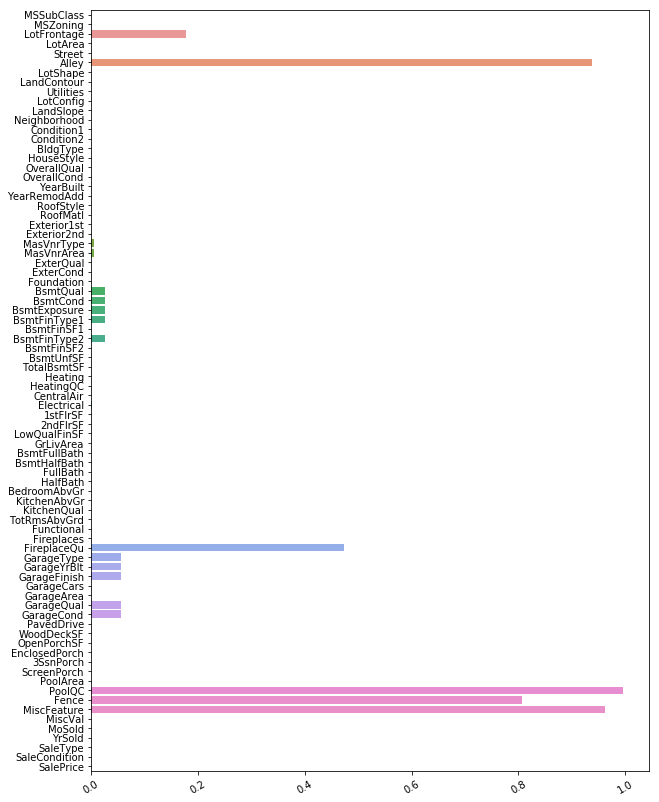

In [6]:
plt.figure(figsize=(10,14))
sns.barplot(x=df.isna().sum()/df.shape[0], y=df.columns, orient='h')
plt.xticks(rotation=30)
plt.show()

**Point 2**

C:\Users\Alexey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


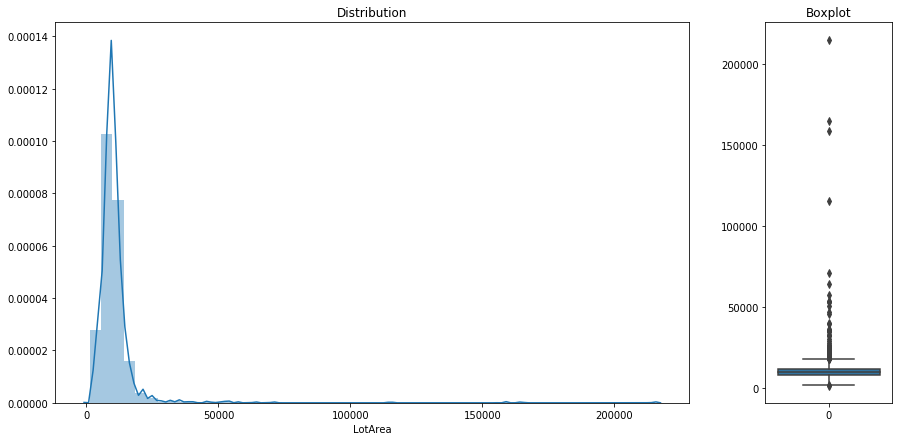

In [7]:
plt.figure(figsize=(15,7))
gs = grc.GridSpec(1, 2, width_ratios=[5, 1])
plt.subplot(gs[0])
sns.distplot(df['LotArea'], hist=True)
plt.title('Distribution')

plt.subplot(gs[1])
sns.boxplot(data = df['LotArea'])
plt.title('Boxplot')
plt.show()

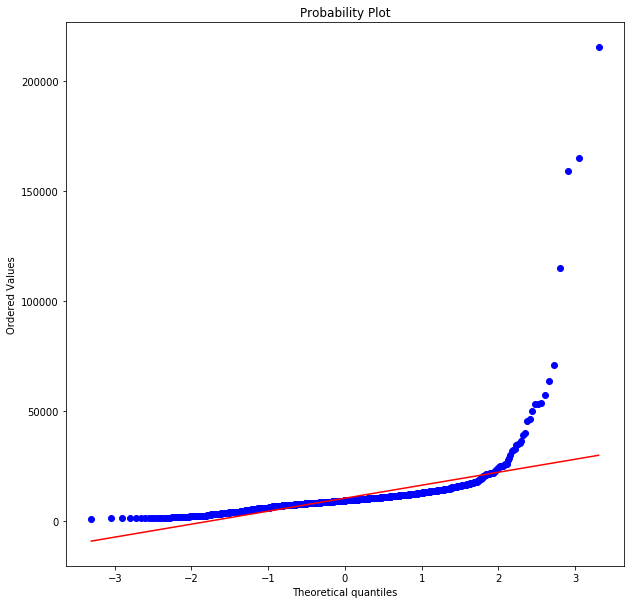

In [8]:
plt.figure(figsize=(10, 10))
st.probplot(df['LotArea'], dist="norm", plot=plt)
plt.show()

**Conclusions:**

Data in LotArea is not normally distrubuted.   

**Point 3**

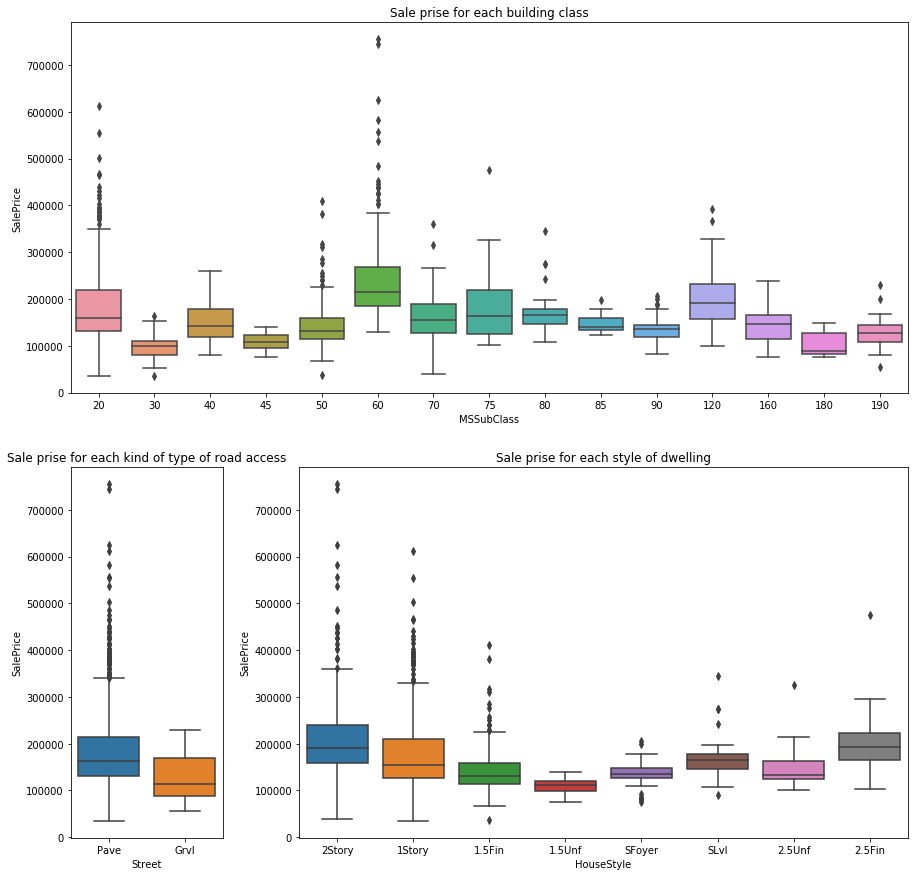

In [9]:
plt.figure(figsize=(15, 15))
gs = grc.GridSpec(2, 2, width_ratios=[1,4], height_ratios=[1,1])

plt.subplot(gs[0, :])
sns.boxplot(data=df, x='MSSubClass', y='SalePrice')
plt.title('Sale prise for each building class')

plt.subplot(gs[1, :-1])
sns.boxplot(data=df, x='Street', y='SalePrice')
plt.title('Sale prise for each kind of type of road access')

plt.subplot(gs[1:, -1])
sns.boxplot(data=df, x='HouseStyle', y='SalePrice')
plt.title('Sale prise for each style of dwelling')

plt.show()   

Conclusions:

**Point 4**

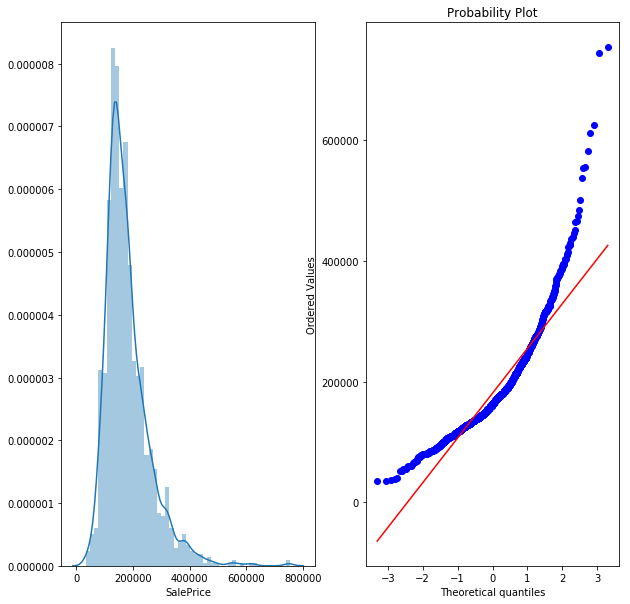

In [10]:
plt.figure(figsize=(10, 10))
gs = grc.GridSpec(1, 2)

plt.subplot(gs[0])
sns.distplot(df['SalePrice'], hist=True)

plt.subplot(gs[1])
st.probplot(df['SalePrice'], dist="norm", plot=plt)
plt.show()

In [11]:
# Assuming the variable is subject to Student distr.
mean = df['SalePrice'].mean()
SE = df['SalePrice'].std()/sqrt(df['SalePrice'].size)
t_crit = st.t.ppf(q=0.975, df=len(df)-1)
err_margin = t_crit * SE
CI = (round(mean - err_margin, 2), round(mean + err_margin, 2))
print('95% confidence interval for sale price:', CI)

95% confidence interval for sale price: (176842.84, 184999.55)


**Point 5**

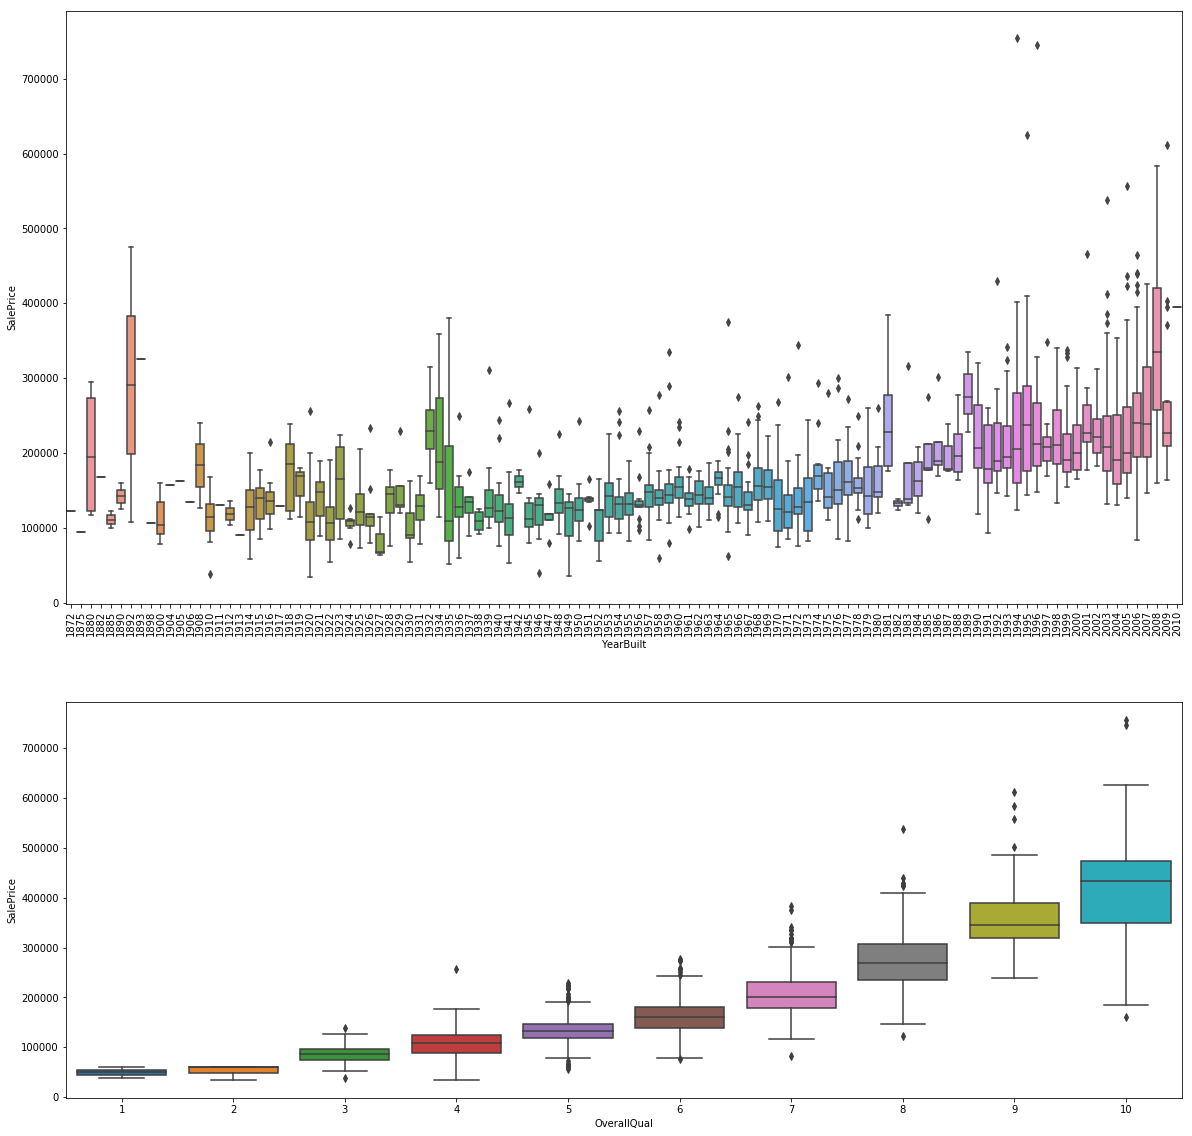

In [12]:
plt.figure(figsize=(20, 20))
gs = grc.GridSpec(2, 1, height_ratios=[3,2])

plt.subplot(gs[0])
sns.boxplot(data=df, x='YearBuilt', y='SalePrice')
plt.xticks(rotation=90)

plt.subplot(gs[1])
sns.boxplot(data=df, x='OverallQual', y='SalePrice')

plt.show()

**Point 6**

**Point 8**

#### Sorting all variables into 2 groups: continous, binary + categorial. 

Sorting will be performed with three steps.  

On the first step an auxiliary DataFrame `var_type_df` will be constructed. It will contain names of all variables `VarName` from training DataFrame `train_df`, type of variable - `dtype`, percetage of unique values in each variable - `%unique`, and short description `ShortDescr` for every variable taken from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). 

On the second step a coarse sorting will be performed. It will be based on a simple rule relying on detected data types of variables. So, supposedly the relatively small quantity of variables should remain uncorrectly sorted.

Finally, on the third step the fine sorting will be performed in a manual way via the data description.

* Step 1. Constructing the auxiliary DF 

In [13]:
# Copy-pasting the short description from Kaggle to exel sheet, previosly naming the column and then loading it up here as 
# single column DataFrame
data_descr = pd.read_excel('short_descr.xls')
data_descr

,One unsplitted column
0,SalePrice: The property's sale price in dollars. This is the target variable that you're trying to predict.
1,MSSubClass: The building class
2,MSZoning: The general zoning classification
3,LotFrontage: Linear feet of street connected to property
4,LotArea: Lot size in square feet
5,Street: Type of road access
6,Alley: Type of alley access
7,LotShape: General shape of property
8,LandContour: Flatness of the property
9,Utilities: Type of utilities available


In [14]:
# Spliting single column on the variable name and description columns and setting the variable name as new index
data_descr['VariableName'] = data_descr['One unsplitted column'].apply(lambda x: x.split(': ')[0])
data_descr['ShortDescr'] = data_descr['One unsplitted column'].apply(lambda x: x.split(': ')[1])
data_descr = data_descr.drop(['One unsplitted column'], axis = 1)
data_descr.set_index('VariableName')

,ShortDescr
VariableName,
SalePrice,The property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass,The building class
MSZoning,The general zoning classification
LotFrontage,Linear feet of street connected to property
LotArea,Lot size in square feet
Street,Type of road access
Alley,Type of alley access
LotShape,General shape of property
LandContour,Flatness of the property


In [15]:
# Constructing the auxiliary DF and merging it with the description DF from previos step
var_type_df= pd.DataFrame({'VarName': np.array(df.columns),\
                           'dtype': np.array(df.dtypes), \
                           'Nunique': np.array(df.nunique()), \
                           '%unique': np.array(100 * df.nunique() / df.shape[0])}).sort_values(by='%unique')
var_type_df.set_index('VarName')
var_type_df = var_type_df.merge(data_descr, left_on= ['VarName'], right_on=['VariableName']).drop(['VariableName'], axis=1)
var_type_df

,VarName,dtype,Nunique,%unique,ShortDescr
0,Street,object,2,0.136986,Type of road access
1,Alley,object,2,0.136986,Type of alley access
2,Utilities,object,2,0.136986,Type of utilities available
3,CentralAir,object,2,0.136986,Central air conditioning
4,HalfBath,int64,3,0.205479,Half baths above grade
5,PavedDrive,object,3,0.205479,Paved driveway
6,BsmtHalfBath,int64,3,0.205479,Basement half bathrooms
7,LandSlope,object,3,0.205479,Slope of property
8,PoolQC,object,3,0.205479,Pool quality
9,GarageFinish,object,3,0.205479,Interior finish of the garage


* Step 2. As it is seen from constructed DF there are only 3 types of variables - `int64`, `float64` and `object`. For the first time lets rely variables with type `int64` and `float64` to continous variables and variables with type `object` and with type `int64` with only 2 unique values to binary + categorical.

In [16]:
# Sorting variable names into 2 lists with simple rule and removing target variable 
CV_cols = (var_type_df[(var_type_df['dtype'] == 'float64') | (var_type_df['dtype'] == 'int64')]['VarName']).tolist()
CV_cols.remove('SalePrice')
BCV_cols = (var_type_df[var_type_df['dtype'] == 'object']['VarName']).tolist()

Lets check what was done

In [17]:
df[CV_cols].head(15)

,HalfBath,BsmtHalfBath,Fireplaces,BsmtFullBath,FullBath,GarageCars,YrSold,PoolArea,OverallCond,OverallQual,MoSold,TotRmsAbvGrd,MSSubClass,3SsnPorch,MiscVal,LowQualFinSF,YearRemodAdd,ScreenPorch,GarageYrBlt,LotFrontage,YearBuilt,EnclosedPorch,BsmtFinSF2,OpenPorchSF,WoodDeckSF,MasVnrArea,2ndFlrSF,GarageArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,BsmtUnfSF,GrLivArea,LotArea
0,1,0,0,1,2,2,2008,0,5,7,2,8,60,0,0,0,2003,0,2003.0,65.0,2003,0,0,61,0,196.0,854,548,706,856,856,150,1710,8450
1,0,1,1,0,2,2,2007,0,8,6,5,6,20,0,0,0,1976,0,1976.0,80.0,1976,0,0,0,298,0.0,0,460,978,1262,1262,284,1262,9600
2,1,0,1,1,2,2,2008,0,5,7,9,6,60,0,0,0,2002,0,2001.0,68.0,2001,0,0,42,0,162.0,866,608,486,920,920,434,1786,11250
3,0,0,1,1,1,3,2006,0,5,7,2,7,70,0,0,0,1970,0,1998.0,60.0,1915,272,0,35,0,0.0,756,642,216,756,961,540,1717,9550
4,1,0,1,1,2,3,2008,0,5,8,12,9,60,0,0,0,2000,0,2000.0,84.0,2000,0,0,84,192,350.0,1053,836,655,1145,1145,490,2198,14260
5,1,0,0,1,1,2,2009,0,5,5,10,5,50,320,700,0,1995,0,1993.0,85.0,1993,0,0,30,40,0.0,566,480,732,796,796,64,1362,14115
6,0,0,1,1,2,2,2007,0,5,8,8,7,20,0,0,0,2005,0,2004.0,75.0,2004,0,0,57,255,186.0,0,636,1369,1686,1694,317,1694,10084
7,1,0,2,1,2,2,2009,0,6,7,11,7,60,0,350,0,1973,0,1973.0,NaN,1973,228,32,204,235,240.0,983,484,859,1107,1107,216,2090,10382
8,0,0,2,0,2,2,2008,0,5,7,4,8,50,0,0,0,1950,0,1931.0,51.0,1931,205,0,0,90,0.0,752,468,0,952,1022,952,1774,6120
9,0,0,2,1,1,1,2008,0,6,5,1,5,190,0,0,0,1950,0,1939.0,50.0,1939,0,0,4,0,0.0,0,205,851,991,1077,140,1077,7420


In [18]:
df[BCV_cols].head(15)

,Street,Alley,Utilities,CentralAir,PavedDrive,LandSlope,PoolQC,GarageFinish,ExterQual,KitchenQual,MasVnrType,BsmtExposure,Fence,MiscFeature,BsmtQual,LandContour,LotShape,BsmtCond,FireplaceQu,GarageQual,GarageCond,Electrical,HeatingQC,ExterCond,MSZoning,LotConfig,BldgType,RoofStyle,Heating,SaleCondition,Foundation,GarageType,BsmtFinType2,BsmtFinType1,Functional,HouseStyle,Condition2,RoofMatl,SaleType,Condition1,Exterior1st,Exterior2nd,Neighborhood
0,Pave,NaN,AllPub,Y,Y,Gtl,NaN,RFn,Gd,Gd,BrkFace,No,NaN,NaN,Gd,Lvl,Reg,TA,NaN,TA,TA,SBrkr,Ex,TA,RL,Inside,1Fam,Gable,GasA,Normal,PConc,Attchd,Unf,GLQ,Typ,2Story,Norm,CompShg,WD,Norm,VinylSd,VinylSd,CollgCr
1,Pave,NaN,AllPub,Y,Y,Gtl,NaN,RFn,TA,TA,None,Gd,NaN,NaN,Gd,Lvl,Reg,TA,TA,TA,TA,SBrkr,Ex,TA,RL,FR2,1Fam,Gable,GasA,Normal,CBlock,Attchd,Unf,ALQ,Typ,1Story,Norm,CompShg,WD,Feedr,MetalSd,MetalSd,Veenker
2,Pave,NaN,AllPub,Y,Y,Gtl,NaN,RFn,Gd,Gd,BrkFace,Mn,NaN,NaN,Gd,Lvl,IR1,TA,TA,TA,TA,SBrkr,Ex,TA,RL,Inside,1Fam,Gable,GasA,Normal,PConc,Attchd,Unf,GLQ,Typ,2Story,Norm,CompShg,WD,Norm,VinylSd,VinylSd,CollgCr
3,Pave,NaN,AllPub,Y,Y,Gtl,NaN,Unf,TA,Gd,None,No,NaN,NaN,TA,Lvl,IR1,Gd,Gd,TA,TA,SBrkr,Gd,TA,RL,Corner,1Fam,Gable,GasA,Abnorml,BrkTil,Detchd,Unf,ALQ,Typ,2Story,Norm,CompShg,WD,Norm,Wd Sdng,Wd Shng,Crawfor
4,Pave,NaN,AllPub,Y,Y,Gtl,NaN,RFn,Gd,Gd,BrkFace,Av,NaN,NaN,Gd,Lvl,IR1,TA,TA,TA,TA,SBrkr,Ex,TA,RL,FR2,1Fam,Gable,GasA,Normal,PConc,Attchd,Unf,GLQ,Typ,2Story,Norm,CompShg,WD,Norm,VinylSd,VinylSd,NoRidge
5,Pave,NaN,AllPub,Y,Y,Gtl,NaN,Unf,TA,TA,None,No,MnPrv,Shed,Gd,Lvl,IR1,TA,NaN,TA,TA,SBrkr,Ex,TA,RL,Inside,1Fam,Gable,GasA,Normal,Wood,Attchd,Unf,GLQ,Typ,1.5Fin,Norm,CompShg,WD,Norm,VinylSd,VinylSd,Mitchel
6,Pave,NaN,AllPub,Y,Y,Gtl,NaN,RFn,Gd,Gd,Stone,Av,NaN,NaN,Ex,Lvl,Reg,TA,Gd,TA,TA,SBrkr,Ex,TA,RL,Inside,1Fam,Gable,GasA,Normal,PConc,Attchd,Unf,GLQ,Typ,1Story,Norm,CompShg,WD,Norm,VinylSd,VinylSd,Somerst
7,Pave,NaN,AllPub,Y,Y,Gtl,NaN,RFn,TA,TA,Stone,Mn,NaN,Shed,Gd,Lvl,IR1,TA,TA,TA,TA,SBrkr,Ex,TA,RL,Corner,1Fam,Gable,GasA,Normal,CBlock,Attchd,BLQ,ALQ,Typ,2Story,Norm,CompShg,WD,PosN,HdBoard,HdBoard,NWAmes
8,Pave,NaN,AllPub,Y,Y,Gtl,NaN,Unf,TA,TA,None,No,NaN,NaN,TA,Lvl,Reg,TA,TA,Fa,TA,FuseF,Gd,TA,RM,Inside,1Fam,Gable,GasA,Abnorml,BrkTil,Detchd,Unf,Unf,Min1,1.5Fin,Norm,CompShg,WD,Artery,BrkFace,Wd Shng,OldTown
9,Pave,NaN,AllPub,Y,Y,Gtl,NaN,RFn,TA,TA,None,No,NaN,NaN,TA,Lvl,Reg,TA,TA,Gd,TA,SBrkr,Ex,TA,RL,Corner,2fmCon,Gable,GasA,Normal,BrkTil,Attchd,Unf,GLQ,Typ,1.5Unf,Artery,CompShg,WD,Artery,MetalSd,MetalSd,BrkSide


So, at least it doesn't look hopeless. As it was expected only the small part of variables was sorted incorectly. At present step binary + categorical vars doesn't contain categorical variables with categories designated by digits and numbers - `MSSubClass`, `OverallQual`, `OverallCond`. It was relyed to continous variables. Lets correct this mistake and replace them to `CV_cols` manually. 

In [19]:
# Adding the columns to one DF from another and than replacing it from another
repl_cols = ['MSSubClass', 'OverallQual', 'OverallCond']
BCV_cols.extend(repl_cols)
BCV_cols = list(set(BCV_cols))
CV_cols = list(set(CV_cols) - set(repl_cols))

#### Point 10

Lets check correlation between `SalePrice` and other variables

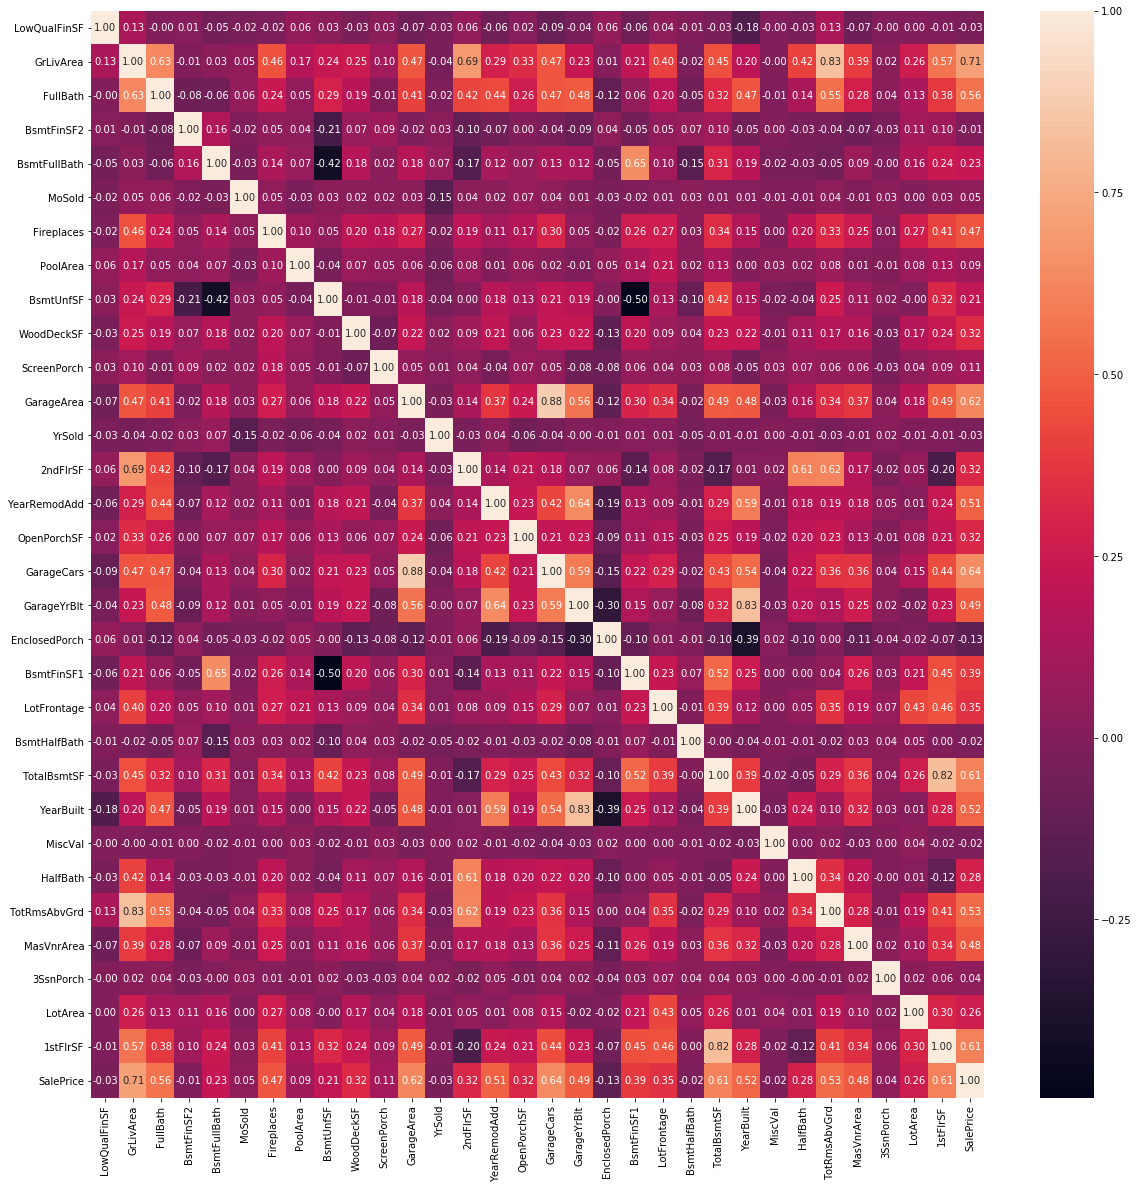

In [20]:
plt.figure(figsize=(20, 20))
sns.heatmap(pd.concat([df[CV_cols], df["SalePrice"]], axis = 1).corr(), annot=True, fmt=".2f")
plt.show()

It was found that strongest correlation (higher than 0.50) is between `SalePrice` and 

`GrLivArea`, 

`GarageCars`, 

`GarageArea`, 

`TotalBsmtSf`,

`1stFlrSF`, 

`FullBath`, 

`TotRmsAbvGrd`, 

`YearBuild`, 

`YearRemodAdd`

#### Point 11

In [21]:
#Calculating percentage of missed values in continous variables DF
NaN_CV_perc = (df[CV_cols].isna().sum() + (df[CV_cols] == 'None').sum())*100/df[CV_cols].shape[0]
NaN_CV_perc

LowQualFinSF      0.000000
GrLivArea         0.000000
FullBath          0.000000
BsmtFinSF2        0.000000
BsmtFullBath      0.000000
MoSold            0.000000
Fireplaces        0.000000
PoolArea          0.000000
BsmtUnfSF         0.000000
WoodDeckSF        0.000000
ScreenPorch       0.000000
GarageArea        0.000000
YrSold            0.000000
2ndFlrSF          0.000000
YearRemodAdd      0.000000
OpenPorchSF       0.000000
GarageCars        0.000000
GarageYrBlt       5.547945
EnclosedPorch     0.000000
BsmtFinSF1        0.000000
LotFrontage      17.739726
BsmtHalfBath      0.000000
TotalBsmtSF       0.000000
YearBuilt         0.000000
MiscVal           0.000000
HalfBath          0.000000
TotRmsAbvGrd      0.000000
MasVnrArea        0.547945
3SsnPorch         0.000000
LotArea           0.000000
1stFlrSF          0.000000
dtype: float64

`LotFrontage` with almost 18% of NaNs will be removed. Other vars are quite perfect.

In [22]:
CV_cols.remove('LotFrontage')

In [23]:
#Calculating percentage of missed values in binary + categorical DF
NaN_BCV_perc = (df[BCV_cols].isna().sum() + (df[BCV_cols] == 'None').sum())*100/df[BCV_cols].shape[0]
NaN_BCV_perc

SaleType          0.000000
MiscFeature      96.301370
Condition1        0.000000
MasVnrType       59.726027
LotShape          0.000000
HeatingQC         0.000000
LotConfig         0.000000
CentralAir        0.000000
ExterCond         0.000000
GarageType        5.547945
Electrical        0.068493
RoofMatl          0.000000
MSZoning          0.000000
Functional        0.000000
BldgType          0.000000
OverallQual       0.000000
GarageCond        5.547945
Fence            80.753425
MSSubClass        0.000000
Exterior2nd       0.000000
FireplaceQu      47.260274
OverallCond       0.000000
BsmtExposure      2.602740
PavedDrive        0.000000
RoofStyle         0.000000
BsmtCond          2.534247
LandContour       0.000000
Exterior1st       0.000000
Heating           0.000000
Street            0.000000
KitchenQual       0.000000
BsmtFinType2      2.602740
GarageFinish      5.547945
Foundation        0.000000
ExterQual         0.000000
LandSlope         0.000000
HouseStyle        0.000000
U

In [24]:
#These columns have over 40 % of NaNs and will be removed
BCV_rem_cols = NaN_BCV_perc[NaN_BCV_perc > 40].index.tolist()
BCV_cols = list(set(BCV_cols) - set(BCV_rem_cols))

Removing continous vars with outliers

In [25]:
# Constructing a function clearly showing the outliers
def plot_boxplots(df, n_hor, fig_h, fig_w):
    
    """Plots a matrix of boxplots of variables in inputted DF.
       df - DF to input;
       n_hor - number of horizontal plots;
       fig_h, fig_w - matrix hight and width respectively"""
    
    n_cols = df.shape[1]
    n_vert = n_cols // n_hor 
    gs = grc.GridSpec(n_vert, n_hor)
    plt.figure(figsize=(fig_w, fig_h))
    for i in enumerate(df.columns.tolist()):
        plt.subplot(gs[i[0]//n_hor, i[0]-n_hor*(i[0]//n_hor)])
        sns.boxplot(data=df[i[1]])
        q1, q3 = np.percentile(df[i[1]], [25, 75])
        iqr = q3 - q1
        low_bound = q1 - 1.5 * iqr
        up_bound = q3 + 1.5 * iqr
        out_perc = df[i[1]][(df[i[1]] < low_bound) | (df[i[1]] > up_bound)].count() / df[i[1]].count() * 100
        plt.title(i[1] + ' ' + str(round(out_perc, 2)) + ' % out')
    return plt.show()

C:\Users\Alexey\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


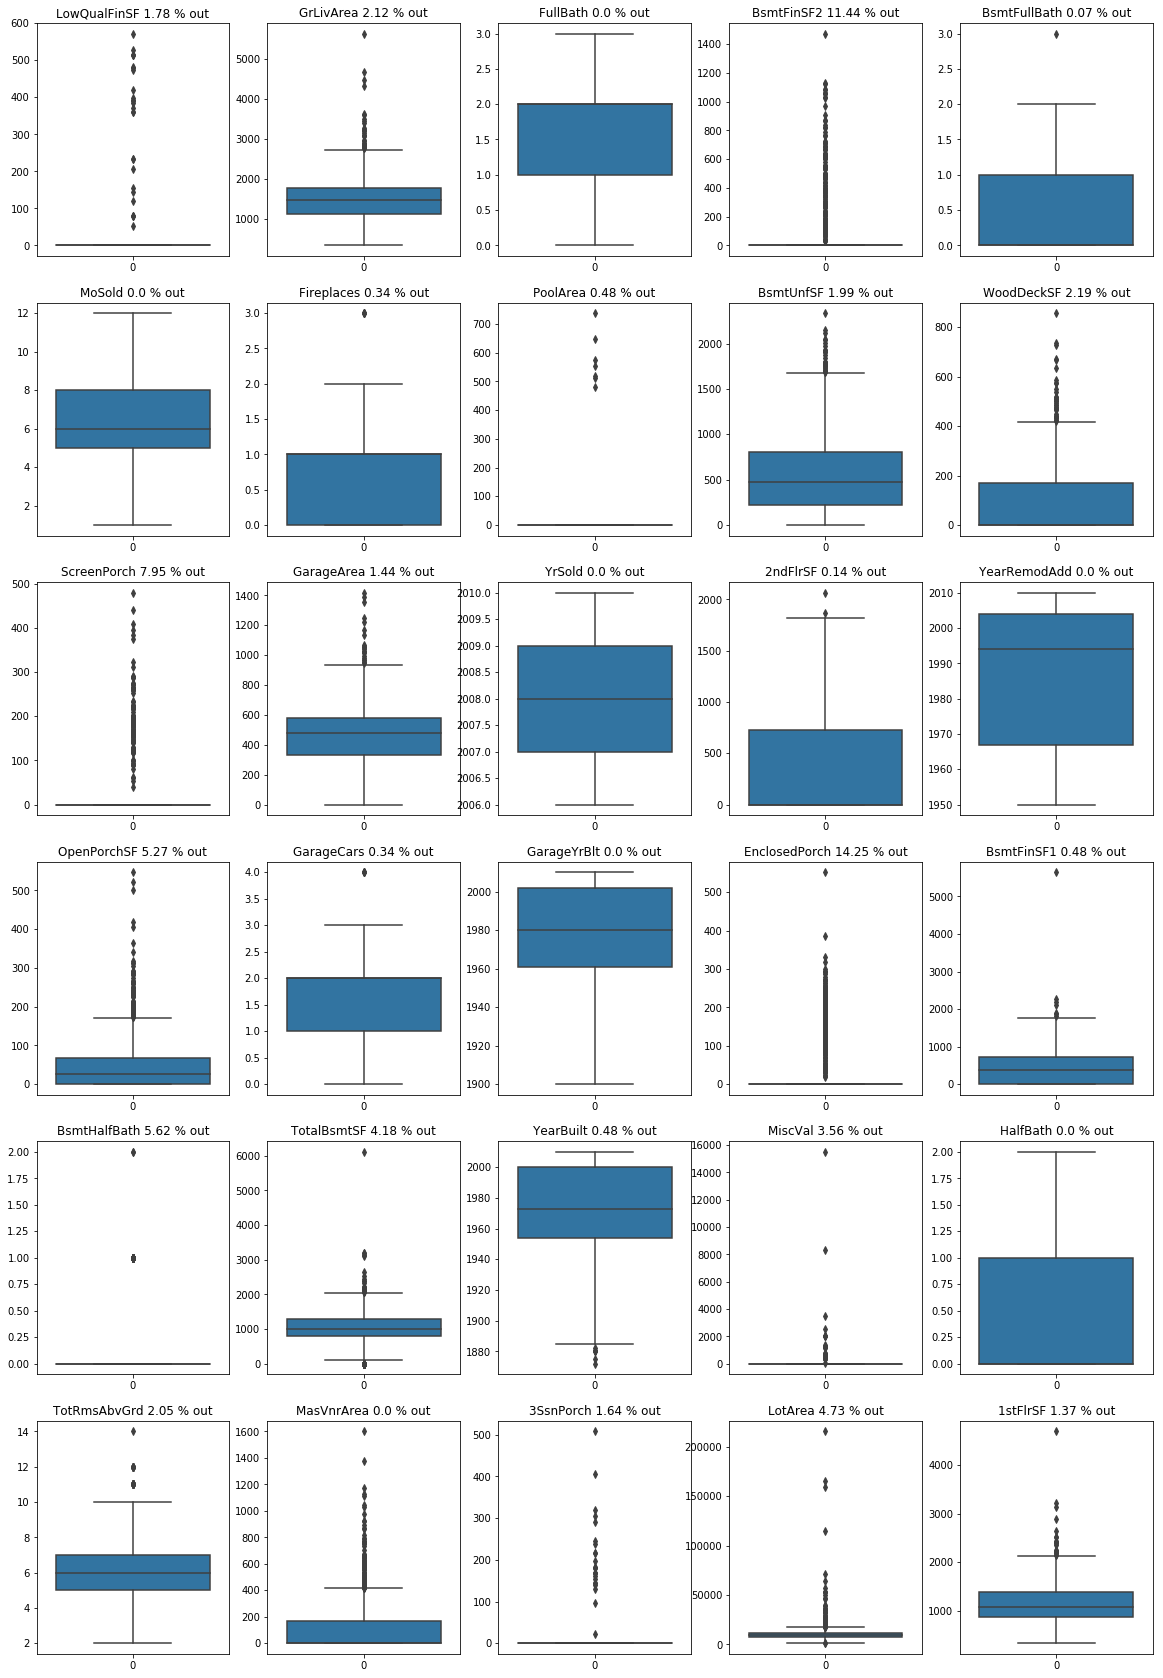

In [26]:
plot_boxplots(df[CV_cols], n_hor=5, fig_h=30, fig_w=20)

In [27]:
# Constructing a function gives some quantitive data on vars variability
def find_outliers(df, target, p1, p3, q):
    
    """Returns  lower/upper bound of interquantile range, outliers percent, percent of zeros, coef. of variation,
       correlation coef, and its statistical significance for each var in the inputed DF.
       df - DataFrame to input;
       target - name of target var;
       p1, p3 - percentiles
       q - confidence level for the statistical significance of corr. coeff estimation"""
    
    df_out = pd.DataFrame()
    for i in df.columns.tolist():
        q1, q3 = np.percentile(df[i], [p1, p3])
        iqr = q3 - q1
        low_bound = q1 - 1.5 * iqr
        up_bound = q3 + 1.5 * iqr
        out_perc = df[i][(df[i] < low_bound) | (df[i] > up_bound)].count() / df[i].count() * 100
        coef_var = round(st.variation(df[i]), 3)
        zero_val_perc = round(df[df[i] == 0][i].count() * 100 / len(df[i]), 3)
        corr_coef = round(np.corrcoef(df[i], target)[0, 1], 3)
        T_cor = corr_coef * sqrt(len(df[i]) - 2) / sqrt(1 - corr_coef ** 2)
        t_crit = st.t.ppf(q, len(df[i]) - 2)
        stat_sign = 0
        if abs(T_cor) < abs(t_crit):
            stat_sign = 'no'
        else: stat_sign = 'yes'
        df_out_temp = pd.DataFrame({'var': [i], 'low_bound': [low_bound], 'up_bound': [up_bound], \
                                    '%_outliers': [out_perc], 'zero_val_perc': [zero_val_perc], \
                                    'coef_variation': coef_var, 'r': [corr_coef], 'r_stat_sign': [stat_sign]})
        df_out = df_out.append(df_out_temp)
    df_out = df_out.set_index('var').sort_values('%_outliers', ascending=False)
    return df_out

In [28]:
outliers = find_outliers(df[CV_cols], df['SalePrice'], 25, 75, 0.95)
outliers

,low_bound,up_bound,%_outliers,zero_val_perc,coef_variation,r,r_stat_sign
var,,,,,,,
EnclosedPorch,0.000,0.000,14.246575,85.753,2.783,-0.129,yes
BsmtFinSF2,0.000,0.000,11.438356,88.562,3.464,-0.011,no
ScreenPorch,0.000,0.000,7.945205,92.055,3.701,0.111,yes
BsmtHalfBath,0.000,0.000,5.616438,94.384,4.148,-0.017,no
OpenPorchSF,-102.000,170.000,5.273973,44.932,1.419,0.316,yes
LotArea,1481.500,17673.500,4.726027,0.000,0.949,0.264,yes
TotalBsmtSF,42.000,2052.000,4.178082,2.534,0.415,0.614,yes
MiscVal,0.000,0.000,3.561644,96.438,11.404,-0.021,no
WoodDeckSF,-252.000,420.000,2.191781,52.123,1.329,0.324,yes


In [29]:
# Settind the thresholds to drop columns with outliers
CV_rem_cols2 = outliers[(outliers['r_stat_sign'] == 'no') | (abs(outliers['r']) < 0.1) |\
                                (outliers['zero_val_perc'] > 70)].index.tolist()
CV_rem_cols2

['EnclosedPorch',
 'BsmtFinSF2',
 'ScreenPorch',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 '3SsnPorch',
 'PoolArea',
 'MoSold',
 'YrSold']

In [30]:
CV_cols = list(set(CV_cols) - set(CV_rem_cols2))

In [31]:
# Constructing function to view number of classses and % of each class of categorical + binary variables 
def ClassRatioFunction(df):
    df_col = df.columns.tolist()
    DF = pd.DataFrame(columns=['VarName', 'Cls_N', 'Cls_%'])
    for i in df_col:
        cls_percs = round((df[i].value_counts() * 100 / df.shape[0]), 2).tolist()
        row = pd.DataFrame({'VarName': i, 'Cls_N': len(cls_percs), 'Cls_%': [cls_percs]})
        DF = DF.append(row)
    return DF

In [32]:
ClassRatioFunction(df[BCV_cols])

,VarName,Cls_N,Cls_%
0,SaleType,9,"[86.78, 8.36, 2.95, 0.62, 0.34, 0.34, 0.27, 0.21, 0.14]"
0,Condition1,9,"[86.3, 5.55, 3.29, 1.78, 1.3, 0.75, 0.55, 0.34, 0.14]"
0,LotShape,4,"[63.36, 33.15, 2.81, 0.68]"
0,HeatingQC,5,"[50.75, 29.32, 16.51, 3.36, 0.07]"
0,LotConfig,5,"[72.05, 18.01, 6.44, 3.22, 0.27]"
0,CentralAir,2,"[93.49, 6.51]"
0,ExterCond,5,"[87.81, 10.0, 1.92, 0.21, 0.07]"
0,GarageType,6,"[59.59, 26.51, 6.03, 1.3, 0.62, 0.41]"
0,Electrical,5,"[91.37, 6.44, 1.85, 0.21, 0.07]"
0,RoofMatl,8,"[98.22, 0.75, 0.41, 0.34, 0.07, 0.07, 0.07, 0.07]"


Lets remove variables with high class imbalance: `Street`, `Utilities`, 

In [33]:
#Removing variables with high class imbalance from binary + categorical DF
BCV_rem_cols2 = ['Street', 'Utilities']
BCV_cols = list(set(BCV_cols) - set(BCV_rem_cols2))

Bad columns was removed.
Now time to construct function which makes Train/Test DFs ready for models training

In [34]:
def get_df_for_models(df, CV_cols, BCV_cols, target, GD_perc, test_size, random_state):
    
    '''In case of data with different kinds of variables this function will help to prepare data for models
    training. It transforms categorical variables to binary(pandas.get_dummies()), drops NaNs from rows,
    scales continous vriables and finally splits data to train and test parts (train_test_split() 
    from sklearn).
       df - initial DataFrame;
       CV_cols - list containing names of continuos variables;
       BCV_cols - list containing names of binary and categorical variables;
       target - neme of target variable;
       GD_perc - percent of zeros in dummy vars. If percent of zeros in dummy var will be higher then GD_perc 
                 this var will be removed; 
       test_size - relative size of test DF (for train_test_split());
       random_state - for train_test_split().'''
        
    CV_BCV_Y_df = pd.concat([df[CV_cols], df[BCV_cols], df[target]], axis = 1)
    
    CV_BCV_Y_dropN_df = CV_BCV_Y_df.dropna()
    CV_BCV_Y_dropN_df.index = np.arange(CV_BCV_Y_dropN_df.shape[0])
    
    BCV_GD_df = pd.get_dummies(CV_BCV_Y_dropN_df[BCV_cols].astype(str), drop_first = True, dtype = 'int64')
    
    BCV_GD_dropC_df = BCV_GD_df.drop((BCV_GD_df[BCV_GD_df == 0].count()/BCV_GD_df.shape[0])\
                                     [BCV_GD_df[BCV_GD_df == 0].count()/BCV_GD_df.shape[0] > GD_perc].index.tolist(), axis = 1)
        
    CV_BCV_GD_Y_dropN_df = pd.concat([CV_BCV_Y_dropN_df[CV_cols], BCV_GD_dropC_df, CV_BCV_Y_dropN_df[target]], axis = 1)
    
    X = CV_BCV_GD_Y_dropN_df.drop([target], axis = 1)
    y = CV_BCV_GD_Y_dropN_df[target]
    
    X_train_temp, X_test_temp, y_train, y_test = train_test_split(X, y, \
                                                                  test_size = test_size, \
                                                                  random_state = random_state) 
    
    CV_train_df = X_train_temp[CV_cols]
    CV_test_df = X_test_temp[CV_cols]
    X_train_temp = X_train_temp.drop(CV_cols, axis = 1)
    X_test_temp = X_test_temp.drop(CV_cols, axis = 1)
        
    ss = StandardScaler()
    
    CV_SS_train_df = pd.DataFrame(ss.fit_transform(CV_train_df), \
                                  index = CV_train_df.index, columns = CV_cols)
    CV_SS_test_df = pd.DataFrame(ss.transform(CV_test_df), \
                                 index = CV_test_df.index, columns = CV_cols)
    
    X_train = pd.concat([X_train_temp, CV_SS_train_df], axis = 1)
    X_test = pd.concat([X_test_temp, CV_SS_test_df], axis = 1)
    
    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)
    
    return X_train, y_train, X_test, y_test

In [35]:
# Splitting prepeared data
X_train, y_train, X_test, y_test = get_df_for_models(df, CV_cols, BCV_cols, 'SalePrice', 0.3, 0.25, 18)

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Alexey\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


#### Point 13

Lets construct linear regression manually and then compare how does it work with sklearn functions

In [36]:
class LinearRegressionManual():
    """xxx"""
    def __init__(self, fit_intercept):
        
        self.fit_intercept = fit_intercept
            
    def fit(self, X_train, y_train):
              
        self.X_train = X_train
        self.y_train = y_train
        
        if self.fit_intercept == True:
        
            ones = np.ones(len(self.X_train)).reshape(-1, 1)
        
            if len(np.array(self.X_train).shape) == 1:
                X = np.append(ones, np.array(self.X_train).reshape(-1, 1), axis=1)
            else:
                X = np.append(ones, np.array(self.X_train), axis = 1)
            
        else: 
        
            if len(np.array(self.X_train).shape) == 1:
                X = np.array(self.X_train).reshape(-1, 1)
            else:
                X = np.array(self.X_train)
        
        self.X = X
        Y = np.array(self.y_train).reshape(-1, 1)
        self.Y = Y
        coefs = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
        self.coefs = coefs
                    
    def coeff_(self):
        
        return self.coefs
    
    def coeffSE(self):
        
        Y_pred = (self.X).dot(self.coefs)
        e = self.Y - Y_pred
        sigma2 = e.T.dot(e)/(e.shape[0]-e.shape[1])
        Cov_b = np.linalg.inv((self.X).T.dot(self.X))*(sigma2)
        SE = np.sqrt(np.diag(Cov_b))
        
        if self.fit_intercept == True:
            index = np.append(['\u03B1'], self.X_train.columns)
        else:
            index = self.X_train.columns
        
        coeff_SE_df = pd.DataFrame({'coefs': (self.coefs).flatten(), 'SE': SE}, index = index)
        self.coeff_SE_df = coeff_SE_df
        
        return self.coeff_SE_df
    
    def predict(self, X_test):  
        
        self.X_test = X_test
        
        if self.fit_intercept == True:
        
            ones_ = np.ones(len(self.X_test)).reshape(-1, 1)
        
            if len(np.array(self.X_test).shape) == 1:
                x = np.append(ones_, np.array(self.X_test).reshape(-1, 1), axis=1)
            else:
                x = np.append(ones_, np.array(self.X_test), axis = 1)
            
        else: 
        
            if len(np.array(self.X_test).shape) == 1:
                x = np.array(self.X_test).reshape(-1, 1)
            else:
                x = np.array(self.X_test)
        
        y_pred = x.dot(self.coefs)
        self.y_pred = y_pred
        
        return self.y_pred       

#### Point 6

From previos steps it seems that there is a positive correlation between `YearBuilt` and `SalePrice`. Lets check it with linear regression method. Lets test $H_0: slope = 0$ vs. $H_1: slope > 0$.

In order to test this hypotesys it is necessary to calculate t-statistic: $t = \frac{slope - 0}{SE}$. Since any library for python is not able to calculate SE of regression coefficients let's manually perform an own function:  

First lets get regression coefs and its SE. It will be performed with `LinearRegressionManual()` function

In [ ]:
lrm = LinearRegressionManual(fit_intercept=True)
lrm.fit(df.drop('SalePrice', axis = 1), df['SalePrice'])

Let's calculate t-statistics value:

In [38]:
#t = reg_params_df['coefs'][1] / reg_params_df['SE'][1]
#t

And compare it with critical value of t-statistics:

In [39]:
"""q = np.arange(0, 1, 0.005)
t_crit = st.t.ppf(q=q, df=len(df)-1)
plt.plot(q, t_crit)
plt.title('Critical value of t-statistics (df=1460-1)')
plt.xlabel('significance level')
plt.ylabel('crit. t-value')
plt.show()"""

"q = np.arange(0, 1, 0.005)\nt_crit = st.t.ppf(q=q, df=len(df)-1)\nplt.plot(q, t_crit)\nplt.title('Critical value of t-statistics (df=1460-1)')\nplt.xlabel('significance level')\nplt.ylabel('crit. t-value')\nplt.show()"

Calculated value of t-statistics is much large than critical value, so $H_0$ can be rejected at any significance level. Difference between $slope$ and $0$ is really statistically significant. **`YearBuild` and `SalePrice` are correlated and correlation is positive** 

**Point 7**

Lets do the same with `GrLivArea` and `TotalBsmtSF`.

In [40]:
"""plt.figure(figsize=(20, 20))
gs = grc.GridSpec(2, 1, height_ratios=[3,2])

plt.subplot(gs[0])
sns.boxplot(data=df, x='GrLivArea', y='SalePrice')
plt.xticks(rotation=90)

plt.subplot(gs[1])
sns.boxplot(data=df, x='TotalBsmtSF', y='SalePrice')

plt.show()"""

"plt.figure(figsize=(20, 20))\ngs = grc.GridSpec(2, 1, height_ratios=[3,2])\n\nplt.subplot(gs[0])\nsns.boxplot(data=df, x='GrLivArea', y='SalePrice')\nplt.xticks(rotation=90)\n\nplt.subplot(gs[1])\nsns.boxplot(data=df, x='TotalBsmtSF', y='SalePrice')\n\nplt.show()"

In [41]:
#reg_params_df, reg_metr_df = LinearRegressionFunction(x=df['GrLivArea'],y= df['SalePrice'], fit_intercept=True)

In [42]:
#reg_params_df['coefs'][1]

In [43]:
#t = reg_params_df['coefs'][1] / reg_params_df['SE'][1]
#t

In [44]:
#reg_params_df, reg_metr_df = LinearRegressionFunction(x=df['TotalBsmtSF'],y= df['SalePrice'], fit_intercept=True)

In [45]:
#t = reg_params_df['coefs'][1] / reg_params_df['SE'][1]
#t

Both `GrLivArea` and `TotalBsmtSF` are positivrly correlated with `SalePrice`

#### Unpointed cells

In [46]:
# Lets choose few regressionl models including custom developed LR
lrm = LinearRegressionManual(fit_intercept=True)
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
forest = RandomForestRegressor()

models = [lrm, lr, lasso, ridge, forest]

In [47]:
def fit_at_best_params(X_train, y_train, models, params, cv, scoring):
    fitted_models = []
    for i, j in zip(models, params):
        if j == 0:
            i.fit(X_train, y_train)
        else:
            clf = GridSearchCV(i, j, scoring)
            clf.fit(X_train, y_train)
            i = clf.best_estimator_
        fitted_models.append(i)
    return fitted_models

In [48]:
lasso_params = {'alpha': np.logspace(-10, 10, num=100)}
ridge_params = {'alpha': np.logspace(-10, 10, num=100)}
forest_params = {'max_depth': np.arange(1, 7, 1),\
                 'n_estimators': np.arange(10, 100, 10)}
params = [0, 0, lasso_params, ridge_params, forest_params]

In [49]:
models = fit_at_best_params(X_train, y_train, models, params, cv=5, scoring = 'neg_mean_absolute_error')

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

#### Point 18

#### Point 19

In [50]:
def get_reg_metrics(X, x, y_true, models, fit_intercept = True):
    
    """This function does staff"""
    
    reg_metrics_df = pd.DataFrame(index=['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'R2_adj'])
    
    for i in models:
        y_pred = i.predict(x)
        
        MSE = np.mean((y_true - y_pred) ** 2)
        RMSE = np.sqrt(np.mean((y_true - y_pred) ** 2))
        MAE = np.mean(np.abs(y_true - y_pred))
        MAPE = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

        if fit_intercept == True:

            ones = np.ones(len(X)).reshape(-1, 1)

            if len(np.array(X).shape) == 1:
                X = np.append(ones, np.array(X).reshape(-1, 1), axis=1)
            else:
                X = np.append(ones, np.array(X), axis = 1)

        else: 

            if len(np.array(X).shape) == 1:
                X = np.array(X).reshape(-1, 1)
            else:
                X = np.array(X)

        y_true = np.array(y_true).reshape(-1, 1)
        y_true_xx = y_true - np.mean(y_true)
        y_pred = y_pred.reshape(-1,1)

        e = y_true - y_pred
        y_pred_xx = y_pred - np.mean(y_true)
        R2 = (1 - e.T.dot(e) / y_true_xx.T.dot(y_true_xx)).flatten().item()
        R2_adj = (1 - (e.T.dot(e)/(X.shape[0]-X.shape[1])) / (y_true_xx.T.dot(y_true_xx)/(X.shape[0]-1))).flatten().item()

        reg_metrics_temp = pd.DataFrame({i.__class__.__name__: [MSE, RMSE, MAE, MAPE, R2, R2_adj]},\
                                      index=['MSE', 'RMSE', 'MAE', 'MAPE', 'R2', 'R2_adj'])
        
        reg_metrics_df = pd.concat([reg_metrics_df, reg_metrics_temp], axis = 1, sort = False)

    
    return reg_metrics_df 

In [51]:
# Getting metrics to assess how choosen models works with prepared data
get_reg_metrics(X_train, X_test, y_test, models)

,LinearRegressionManual,LinearRegression,Lasso,Ridge,RandomForestRegressor
MSE,2.806498e+09,2.806498e+09,1.108781e+10,2.592851e+09,9.107106e+09
RMSE,5.297639e+04,5.297639e+04,1.052987e+05,5.092005e+04,9.543116e+04
MAE,2.452431e+04,2.452431e+04,7.609965e+04,2.452551e+04,7.026268e+04
MAPE,1.425746e+01,1.425746e+01,4.431786e+01,1.425414e+01,4.042634e+01
R2,4.597867e-01,4.597867e-01,4.905537e-01,5.009108e-01,8.078116e-01
R2_adj,4.384920e-01,4.379089e-01,4.693709e-01,4.796178e-01,7.994034e-01


#### Point 21

#### Point 22

#### Point 23

#### Feature engineering

In [52]:
# Available vars for the new features constructing
CV_cols

['GrLivArea',
 'FullBath',
 'BsmtFullBath',
 'Fireplaces',
 'BsmtUnfSF',
 'WoodDeckSF',
 'GarageArea',
 '2ndFlrSF',
 'YearRemodAdd',
 'OpenPorchSF',
 'GarageCars',
 'GarageYrBlt',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'YearBuilt',
 'HalfBath',
 'TotRmsAbvGrd',
 'MasVnrArea',
 'LotArea',
 '1stFlrSF']

In [53]:
# Creating DF containing new features 
new_feat_df = pd.DataFrame()

new_feat_df['Frac_liv_area'] = df['GrLivArea'] / (df['TotalBsmtSF'] + \
                                                  df['GarageArea'] + \
                                                  df['OpenPorchSF'] + \
                                                  df['1stFlrSF'] + \
                                                  df['2ndFlrSF']) 

new_feat_df['Bath_liv_area_rat'] = (df['HalfBath'] + df['FullBath']) / df['GrLivArea']

new_feat_df['Area_per_car'] = df['GarageArea'] / df['GarageCars']

new_feat_df['Av_room_area'] = df['GrLivArea'] / df['TotRmsAbvGrd']

# New features will be a type of continous vars
CV_cols.extend(['Frac_liv_area', 'Bath_liv_area_rat', 'Area_per_car', 'Av_room_area'])

# Adding new features to the main DF
df_nf = pd.concat([df, new_feat_df], axis = 1)

# Dropping features which were used at new features creating
feat_to_drop = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OpenPorchSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'FullBath',\
                'GarageCars', 'TotRmsAbvGrd']
#CV_cols =  list(set(CV_cols) - set(feat_to_drop))

In [54]:
# New DF with new features
df_nf

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Frac_liv_area,Bath_liv_area_rat,Area_per_car,Av_room_area
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,0.538583,0.001754,274.000000,213.750000
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,0.422922,0.001585,230.000000,210.333333
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,0.532181,0.001680,304.000000,297.666667
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,0.545079,0.000582,214.000000,245.285714
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,0.515599,0.001365,278.666667,244.222222
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,...,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,0.510495,0.001468,240.000000,272.400000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,...,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,0.415910,0.001181,318.000000,242.000000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,...,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,0.537967,0.001435,242.000000,298.571429
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,...,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,

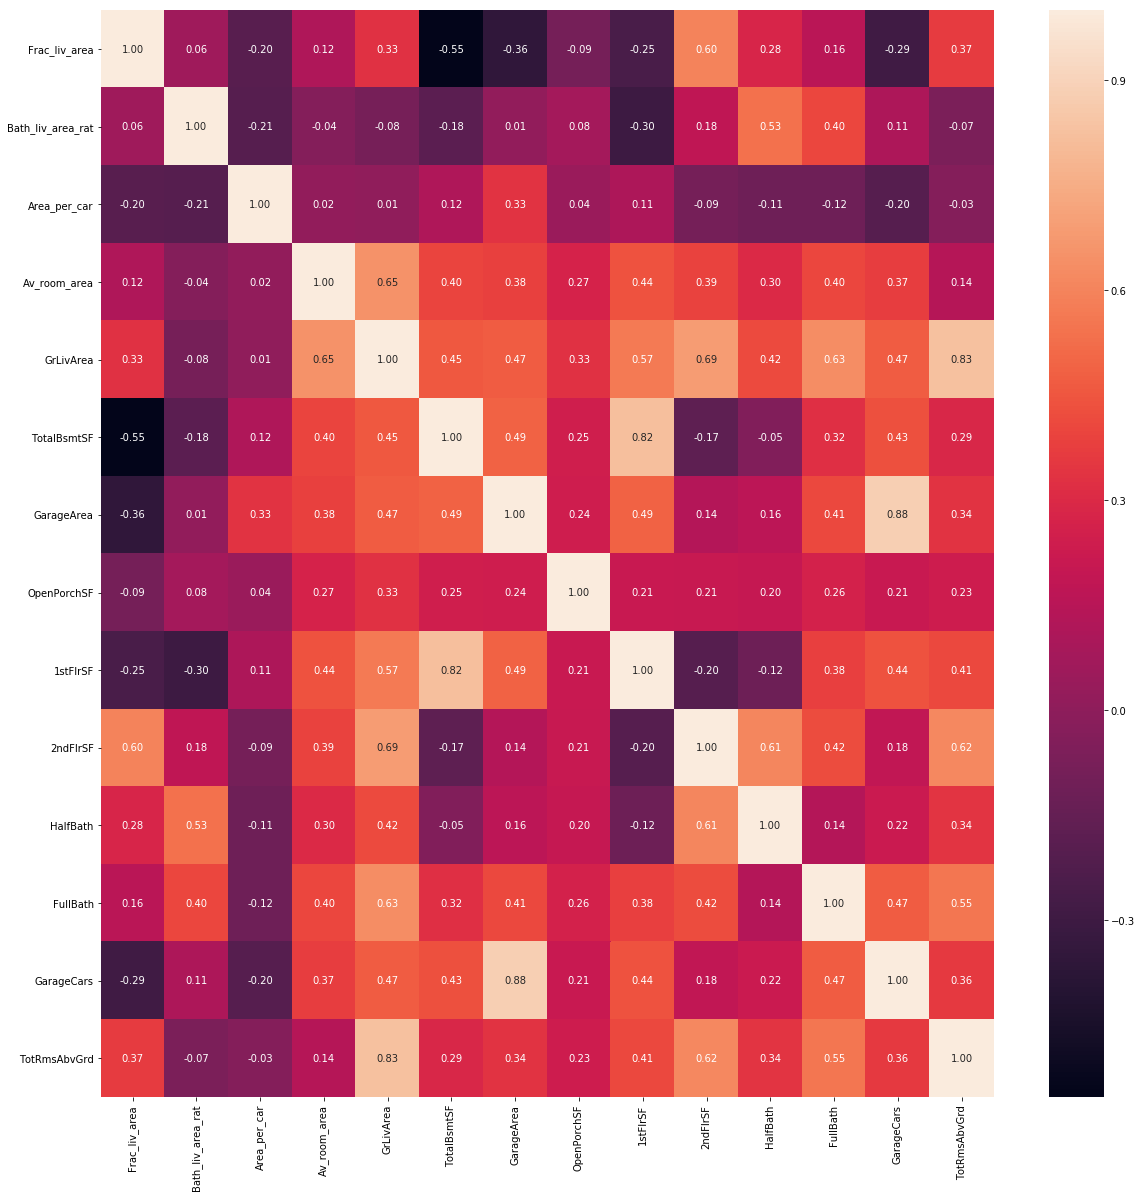

In [55]:
plt.figure(figsize=(20, 20))
to_corr = ['Frac_liv_area', 'Bath_liv_area_rat', 'Area_per_car', 'Av_room_area', \
           'GrLivArea', 'TotalBsmtSF', 'GarageArea', 'OpenPorchSF', '1stFlrSF', '2ndFlrSF', 'HalfBath', 'FullBath',\
           'GarageCars', 'TotRmsAbvGrd']
sns.heatmap(df_nf[to_corr].corr(), annot=True, fmt=".2f")
plt.show()

In [56]:
# Splitting DF with new features on train and test parts
X_train_nf, y_train_nf, X_test_nf, y_test_nf = get_df_for_models(df_nf, CV_cols, BCV_cols, 'SalePrice', 0.3, 0.25, 18)

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Alexey\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


In [57]:
# Fitting all choosen models to data and than getting metrics to assess how it works 
models_nf = fit_at_best_params(X_train_nf, y_train_nf, models, params, cv=5, scoring = 'neg_mean_absolute_error')
get_reg_metrics(X_train_nf, X_test_nf, y_test_nf, models_nf)

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to incr

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to in

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Alexey\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector 

,LinearRegressionManual,LinearRegression,Lasso,Ridge,RandomForestRegressor
MSE,3.100799e+09,3.100799e+09,1.107423e+10,2.496736e+09,9.072722e+09
RMSE,5.568482e+04,5.568482e+04,1.052342e+05,4.996735e+04,9.525084e+04
MAE,2.411940e+04,2.411940e+04,7.616556e+04,2.443813e+04,7.005494e+04
MAPE,1.392753e+01,1.392753e+01,4.433618e+01,1.421504e+01,4.023454e+01
R2,4.031377e-01,4.031377e-01,4.990113e-01,5.194117e-01,8.018019e-01
R2_adj,3.770249e-01,3.763753e-01,4.760014e-01,4.968135e-01,7.922652e-01


In [58]:
def getCoefficients(model, X):
    """Returns sorted coefficient values of the model"""
    coefs = pd.DataFrame(model.coef_.reshape(-1, 1), X.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    return coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)    
    

def plotCoefficients(model, X, y_down, y_up):
    """Plots sorted coefficient values of the model"""
    coefs = getCoefficients(model, X)
    
    plt.figure(figsize=(30, 20))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.ylim((y_down, y_up))
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')
    plt.show()

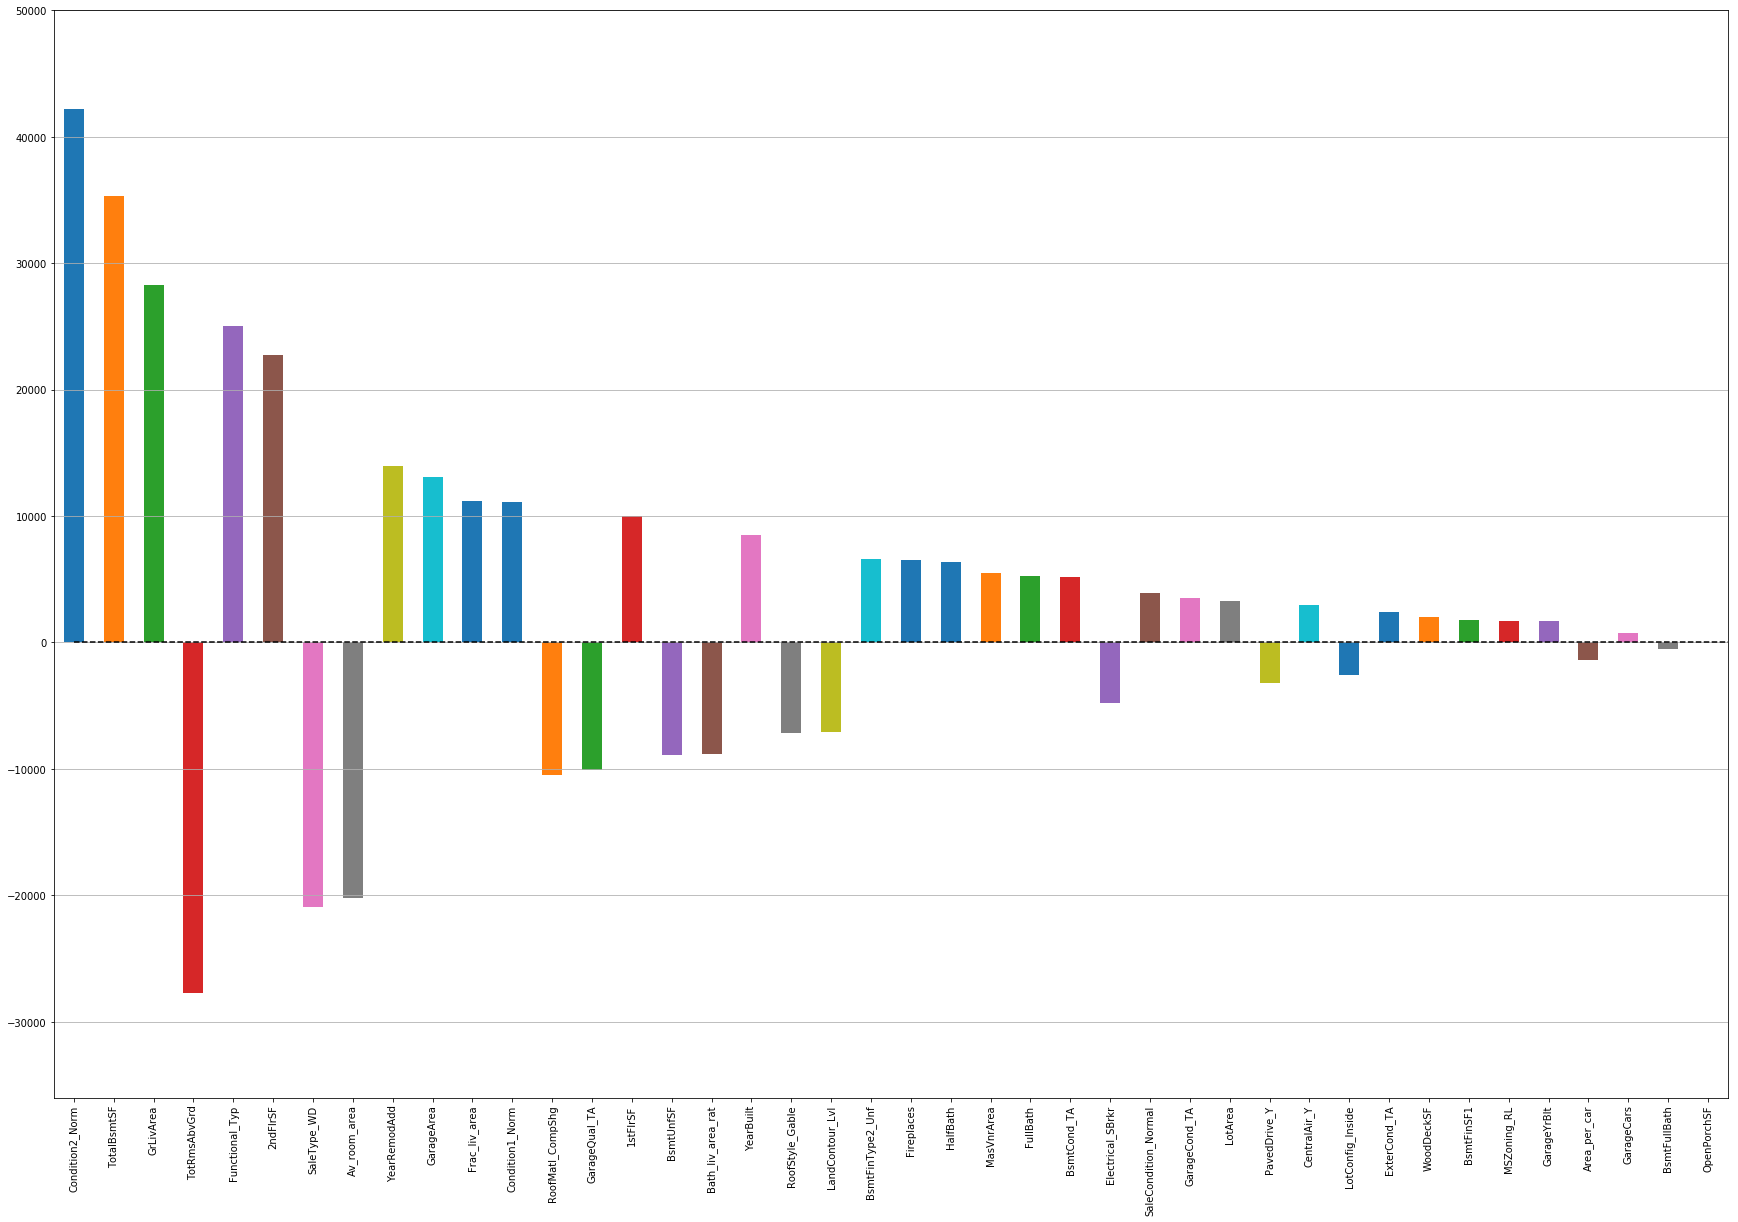

In [59]:
plotCoefficients(lr, X_train_nf, -36000, 50000)

In [60]:
ridge

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)